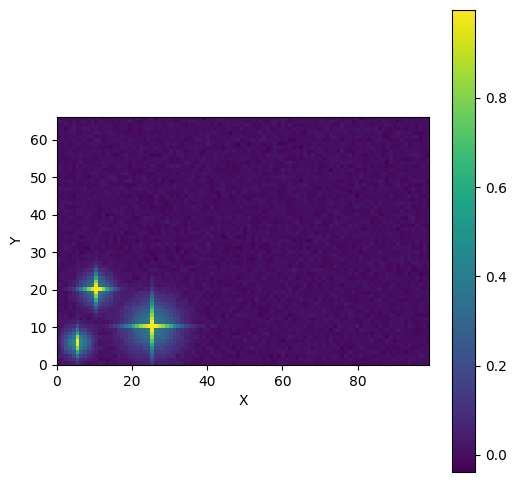

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class GaussianCrossPSF:
    def __init__(self, amplitude=1):
        self.amplitude = amplitude

    def generate_cross_psf(self, x_center, y_center, stddev, background_factor, grid_size_x=300, grid_size_y=200):
        x = np.linspace(0, grid_size_x-1, grid_size_x)
        y = np.linspace(0, grid_size_y-1, grid_size_y)
        x, y = np.meshgrid(x, y)
        
        # Calculate the Gaussian
        psf = self.amplitude * np.exp(-((x - x_center)**2 + (y - y_center)**2) / (2 * stddev**2))
        
        # Calculate the Gaussian along the x and y axes
        psf_x = self.amplitude * np.exp(-((x - x_center)**2) / (2 * stddev**2))
        psf_y = self.amplitude * np.exp(-((y - y_center)**2) / (2 * stddev**2))
        
        # Create a mask that retains higher values along the x and y axes
        mask_x = np.abs(y - y_center) <= 1e-5
        mask_y = np.abs(x - x_center) <= 1e-5
        
        # Apply the mask to the PSF values
        psf_cross = background_factor * psf
        psf_cross[mask_x] = psf_x[mask_x]
        psf_cross[mask_y] = psf_y[mask_y]
        
        return psf_cross

    def plot_multiple_cross_psfs(self, centers_stddevs, grid_size_x=300, grid_size_y=200, noise_level=0):
        combined_psf = np.zeros((grid_size_y, grid_size_x))
        
        for (x_center, y_center, stddev, background_factor) in centers_stddevs:
            psf_cross = self.generate_cross_psf(x_center, y_center, stddev, background_factor, grid_size_x, grid_size_y)
            combined_psf += psf_cross
        
        # Add noise background
        noise = np.random.normal(scale=noise_level, size=(grid_size_y, grid_size_x))
        combined_psf += noise
        
        plt.figure(figsize=(6, 6))
        plt.imshow(combined_psf, extent=(0, grid_size_x-1, 0, grid_size_y-1), origin='lower')
        plt.colorbar()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

# Example:
psf = GaussianCrossPSF(amplitude=1)
centers_stddevs = [(5, git , 2.5, 0.5), (10, 20, 3, 0.4), (25, 10, 5, 0.4)]
psf.plot_multiple_cross_psfs(centers_stddevs, grid_size_x=100, grid_size_y=67, noise_level = 0.01)